# Task 1: Retrieving and Preparing the Data

In [1]:
#   imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Load the data
HFCR = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Data Cleaning and checking

### Overall data checking

In [3]:
HFCR.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
#  quick look at the format of the data
HFCR.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
HFCR.dtypes # Get data type for each column & verify they are correct

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
# check entire dataset for None types, empty strings, or the NumPy type NaN
missing = False
for feature in HFCR:
    for data in feature:
        if data is None or data == '' or data == np.NaN:
            missing = True
if missing:
    print("There are missing values")
else:
    print("There are no missing values")

There are no missing values


### Age

In [7]:
min_age = HFCR["age"].min()
max_age = HFCR["age"].max()
print ("The youngest patient is aged: ", min_age)
print ("The oldest patient is aged: ", max_age)

The youngest patient is aged:  40.0
The oldest patient is aged:  95.0


There are no impossible values in this column since the minimum age surveyed is 40, and the oldest is 95.

### Anaemia

In [8]:
min_ana = HFCR["anaemia"].min()
max_ana = HFCR["anaemia"].max()
print ("The lowest value: ", min_ana)
print ("The highest value: ", max_ana)

The lowest value:  0
The highest value:  1


In [9]:
Error = False
for HFCR["anaemia"] in HFCR:
    for data in HFCR["anaemia"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


By checking the anaemia with using min / max as well as a for loop, we can conclude there are no values other than 0 or
1, which means there are no errors in these boolean values.

### Creatinine Phosphokinase

In [10]:
min_CPK = HFCR["creatinine_phosphokinase"].min()
max_CPK = HFCR["creatinine_phosphokinase"].max()
print ("The lowest value: ", min_CPK)
print ("The highest value: ", max_CPK)

# looking at the IQR of creatinine phosphokinase
Q1 = HFCR["creatinine_phosphokinase"].quantile(0.25)
Q3 = HFCR["creatinine_phosphokinase"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  23
The highest value:  7861
The IQR is: 465.5
The lower outlier threshold is -581.75 and the upper outlier threshold is 1280.25.


Text(0, 0.5, 'CPK Enzyme (mcg/L')

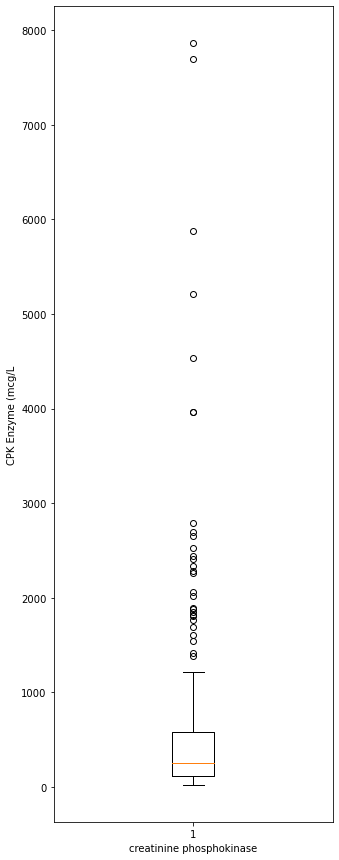

In [11]:

fig = plt.figure(figsize =(5, 15))
plt.boxplot(HFCR["creatinine_phosphokinase"])
plt.xlabel('creatinine phosphokinase')
plt.ylabel('CPK Enzyme (mcg/L')

There appear to be a number of outliers for the level of the CPK enzyme in the blood.

### Diabetes

In [12]:
min_diabetes = HFCR["diabetes"].min()
max_diabetes = HFCR["diabetes"].max()
print ("The lowest value: ", min_diabetes)
print ("The highest value: ", max_diabetes)

The lowest value:  0
The highest value:  1


In [13]:
Error = False
for HFCR["diabetes"] in HFCR:
    for data in HFCR["diabetes"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the anaemia column.

### Ejection fraction

In [14]:
min_EJ = HFCR["ejection_fraction"].min()
max_EJ = HFCR["ejection_fraction"].max()
print ("The lowest value: ", min_EJ)
print ("The highest value: ", max_EJ)

# looking at the IQR of ejection fraction
Q1 = HFCR["ejection_fraction"].quantile(0.25)
Q3 = HFCR["ejection_fraction"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  14
The highest value:  80
The IQR is: 15.0
The lower outlier threshold is 7.5 and the upper outlier threshold is 67.5.


In [15]:
print("Values over 67: ")
HFCR[['ejection_fraction']][HFCR.ejection_fraction > 67]

Values over 67: 


,ejection_fraction
64,80
217,70


Outliers with over 67% ejection fraction has been found at row 64 and 217 of the dataset.

### High Blood Pressure

In [16]:
min_HBP = HFCR["high_blood_pressure"].min()
max_HBP = HFCR["high_blood_pressure"].max()
print ("The lowest value: ", min_HBP)
print ("The highest value: ", max_HBP)

The lowest value:  0
The highest value:  1


In [17]:
for HFCR["high_blood_pressure"] in HFCR:
    for data in HFCR["high_blood_pressure"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the High Blood Pressure column.

### Platelets

In [18]:
min_platelets = HFCR["platelets"].min()
max_platelets = HFCR["platelets"].max()
print ("The lowest value: ", min_platelets)
print ("The highest value: ", max_platelets)

# looking at the IQR of platelets
Q1 = HFCR["platelets"].quantile(0.25)
Q3 = HFCR["platelets"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  25100.0
The highest value:  850000.0
The IQR is: 91000.0
The lower outlier threshold is 76000.0 and the upper outlier threshold is 440000.0.


In [19]:
print("Values below 76000: ")
HFCR[['platelets']][HFCR.platelets < 76000]

Values below 76000: 


,platelets
15,47000.0
163,75000.0
167,70000.0
200,73000.0
230,62000.0
277,25100.0
281,51000.0


In [20]:
print("Values over 440000: ")
HFCR[['platelets']][HFCR.platelets > 440000]

Values over 440000: 


,platelets
7,454000.0
47,451000.0
55,461000.0
69,497000.0
105,621000.0
109,850000.0
117,507000.0
162,448000.0
212,481000.0
224,504000.0


A number of outliers have been found for the Platelets column.

### Serum Creatinine

In [21]:
min_SC = HFCR["serum_creatinine"].min()
max_SC = HFCR["serum_creatinine"].max()
print ("The lowest value: ", min_SC)
print ("The highest value: ", max_SC)

# looking at the IQR of Serum Creatinine
Q1 = HFCR["serum_creatinine"].quantile(0.25)
Q3 = HFCR["serum_creatinine"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  0.5
The highest value:  9.4
The IQR is: 0.4999999999999999
The lower outlier threshold is 0.15000000000000024 and the upper outlier threshold is 2.1499999999999995.


In [22]:
print("Values above 2.1499999999999995: ")
HFCR[['serum_creatinine']][HFCR.serum_creatinine > 2.1499999999999995]

Values above 2.1499999999999995: 


,serum_creatinine
4,2.7
9,9.4
10,4.0
28,5.8
31,3.0
35,3.5
38,2.3
39,3.0
48,4.4
52,6.8


### Serum Sodium

In [23]:
min_SS = HFCR["serum_sodium"].min()
max_SS = HFCR["serum_sodium"].max()
print ("The lowest value: ", min_SS)
print ("The highest value: ", max_SS)

# looking at the IQR of Serum Creatinine
Q1 = HFCR["serum_sodium"].quantile(0.25)
Q3 = HFCR["serum_sodium"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  113
The highest value:  148
The IQR is: 6.0
The lower outlier threshold is 125.0 and the upper outlier threshold is 149.0.


In [24]:
print("Values below 125: ")
HFCR[['serum_sodium']][HFCR.serum_sodium < 125]

Values below 125: 


,serum_sodium
4,116
19,121
126,124
199,113


Here, we can see 4 outliers for the Serum Sodium column.

### Sex

In [25]:
min_S = HFCR["sex"].min()
max_S = HFCR["sex"].max()
print ("The lowest value: ", min_S)
print ("The highest value: ", max_S)

The lowest value:  0
The highest value:  1


In [26]:
for HFCR["sex"] in HFCR:
    for data in HFCR["sex"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the binary values in the Sex column.

### Smoking

In [27]:
min_Smoke = HFCR["smoking"].min()
max_Smoke = HFCR["smoking"].max()
print ("The lowest value: ", min_Smoke)
print ("The highest value: ", max_Smoke)

The lowest value:  0
The highest value:  1


In [28]:
for HFCR["smoking"] in HFCR:
    for data in HFCR["smoking"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the Smoking column.

### Time

In [29]:

min_T = HFCR["time"].min()
max_T = HFCR["time"].max()
print ("The lowest value: ", min_T)
print ("The highest value: ", max_T)

# looking at the IQR of Serum Creatinine
Q1 = HFCR["time"].quantile(0.25)
Q3 = HFCR["time"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  4
The highest value:  285
The IQR is: 130.0
The lower outlier threshold is -122.0 and the upper outlier threshold is 398.0.


All values for Time falls within the IQR and there are no outliers.

### Death Event

In [30]:
min_DE = HFCR["DEATH_EVENT"].min()
max_DE = HFCR["DEATH_EVENT"].max()
print ("The lowest value: ", min_DE)
print ("The highest value: ", max_DE)

The lowest value:  0
The highest value:  1


In [31]:
for HFCR["DEATH_EVENT"] in HFCR:
    for data in HFCR["DEATH_EVENT"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the DEATH EVENT column.

### Statement on Data checking section
Whilst many columns had outliers based of the IQR of that column, we have decided to not touch those values as they
are likely accurate and may represent or indicate some kind of illness or symptom is present. It will be better for
someone with knowledge in medical research or conditions to confirm this.

# Task 2: Data Exploration

## 2.1 Exploring each column
### Age

In [32]:
HFCR = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Q1 = HFCR["age"].quantile(0.25)
Q3 = HFCR["age"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(f"The IQR is: {IQR}")
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The IQR is: 19.0
The lower outlier threshold is 22.5 and the upper outlier threshold is 98.5.


From here, we can see that age is very spread out. However, all patients surveyed are older than 40 and no older than 95.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


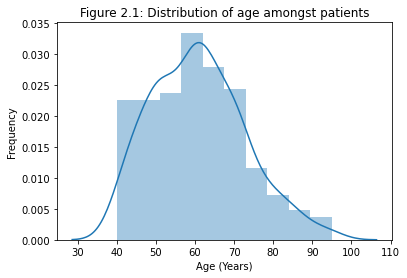

In [33]:
sns.distplot(HFCR["age"], kde=True).set(title=
    "Figure 2.1: Distribution of age amongst patients", xlabel="Age (Years)", ylabel="Frequency")
plt.show;

This graph shows that there is a larger number of younger patients surveyed, evident by right-skewness on the graph.

### Anaemia

In [34]:
HFCR['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [35]:
print("Using this line of code, we can see that 174 patients do not have diabetes whilst 125 does have diabetes")

Using this line of code, we can see that 174 patients do not have diabetes whilst 125 does have diabetes


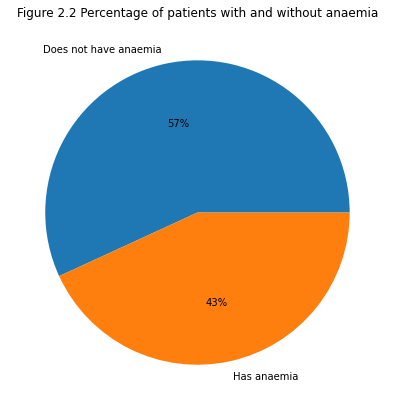

In [36]:
Status = ['Does not have anaemia', 'Has anaemia']
data = [170, 129]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.2 Percentage of patients with and without anaemia')
plt.show()

As we can see here, 43% of patients with anaemia.

### Creatinine Phosphokinase

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


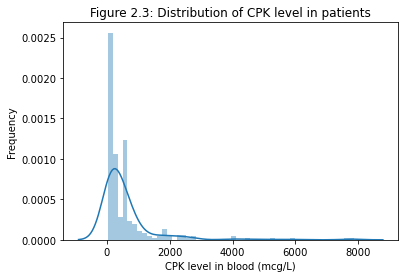

In [37]:
sns.distplot(HFCR["creatinine_phosphokinase"], kde=True).set(title=
    "Figure 2.3: Distribution of CPK level in patients", xlabel="CPK level in blood (mcg/L)", ylabel="Frequency")
plt.show;

As observed here, the majority of patients have a CPK level within the IQR of 465.5mcg/L. Values higher than the upper
outlier threshold of 1280.25 could indicate the patient has underlying health issues or symptoms.

### diabetes

In [38]:
HFCR['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [39]:
print("Using this line of code, we can see that 174 patients do not have diabetes whilst 125 does have diabetes")

Using this line of code, we can see that 174 patients do not have diabetes whilst 125 does have diabetes


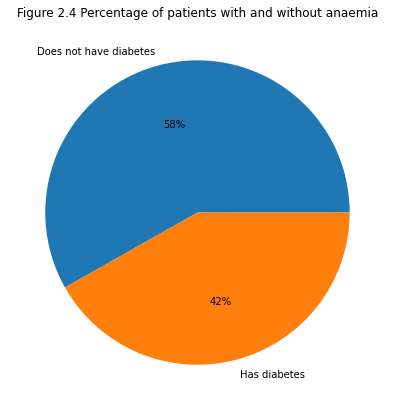

In [40]:
Status = ['Does not have diabetes', 'Has diabetes']
data = [174, 125]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.4 Percentage of patients with and without anaemia')
plt.show()

We can see here that a large number (42%) of patients in the dataset has diabetes.

### Ejection fraction

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


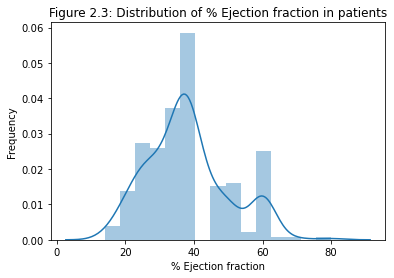

In [41]:
sns.distplot(HFCR["ejection_fraction"], kde=True).set(title=
    "Figure 2.3: Distribution of % Ejection fraction in patients", xlabel="% Ejection fraction", ylabel="Frequency")
plt.show;

As the graph shows us, a large portion of the patients are distributed within the IQR. There are only a few patients
located beyond the upper outlier threshold of 67.5, which could be an indicator of health complications.

### High blood pressure

In [42]:
HFCR['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [43]:
print("Using this line of code, we can see that 194 patients do not have high blood pressure whilst 105 does have high blood presure")

Using this line of code, we can see that 194 patients do not have high blood pressure whilst 105 does have high blood presure


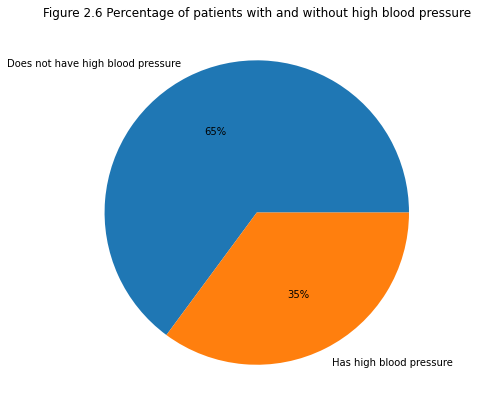

In [44]:
Status = ['Does not have high blood pressure', 'Has high blood pressure']
data = [194, 105]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.6 Percentage of patients with and without high blood pressure')
plt.show()

We can see here that more then half (65%) of patients in the dataset has does not have high blood pressure.

### Platelets

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


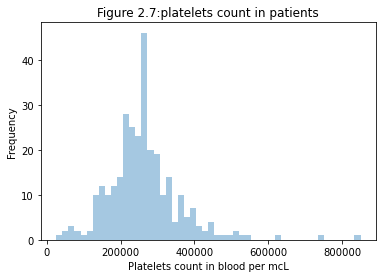

In [45]:
sns.distplot(HFCR["platelets"], kde=False, bins=50).set(title=
    "Figure 2.7:platelets count in patients", xlabel="Platelets count in blood per mcL", ylabel="Frequency")
plt.show;

Where the ideal range of platelets in human are 150,000 to 400,000 per mcL(Balduini & Noris, 2014)

Which can be observed from the graph that most of the pacients have the platelets count within the normal range.

In [46]:
plate = HFCR["platelets"]

In [47]:
len([1 for i in plate if i > 150000 and i < 400000])

251

It shows that 251/300 of the patients are in ideal range.

### Serum creatinine

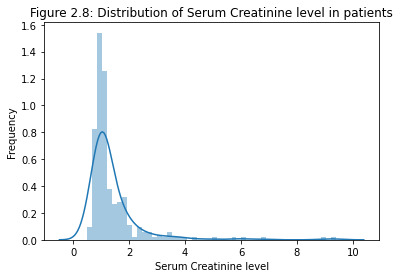

In [48]:
sns.distplot(HFCR["serum_creatinine"], kde=True).set(title=
    "Figure 2.8: Distribution of Serum Creatinine level in patients", xlabel="Serum Creatinine level", ylabel="Frequency")
plt.show;

### Serum sodium

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


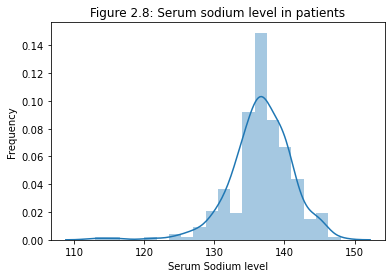

In [49]:
sns.distplot(HFCR["serum_sodium"], kde=True).set(title=
    "Figure 2.8: Serum sodium level in patients", xlabel="Serum Sodium level", ylabel="Frequency")
plt.show;

Where the ideal range of serum sodium in human are 135-145 mmol/L (McKee et al., 2015)

In [50]:
sodium = HFCR["serum_sodium"]

In [51]:
len([1 for i in sodium if i >= 135 and i <= 145])

214

Where 214 out of 300 pacients have the ideal range of serum sodium level.

### Sex

In [52]:
HFCR['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [53]:
print("Using this line of code, we can see that 194 patients are male whilst 105 are female")

Using this line of code, we can see that 194 patients are male whilst 105 are female


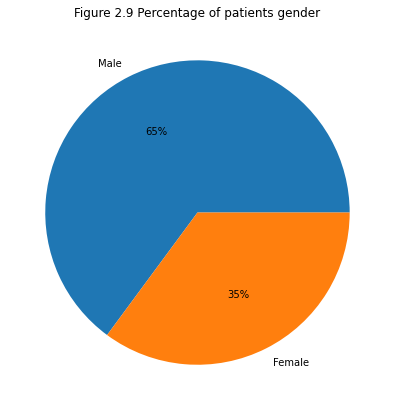

In [54]:
Status = ['Male', 'Female']
data = [194, 105]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.9 Percentage of patients gender')
plt.show()

65% of the patients are male

### Smoking

In [55]:
HFCR['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [56]:
print("Using this line of code, we can see that 203 patients do not smoke whilst 96 are smoking")

Using this line of code, we can see that 203 patients do not smoke whilst 96 are smoking


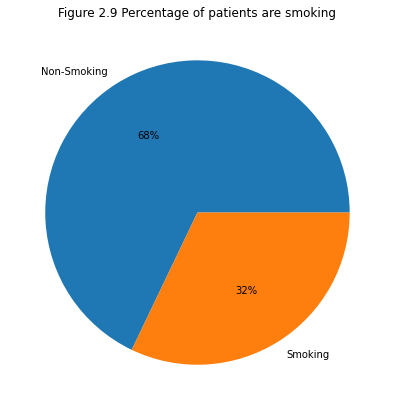

In [57]:
Status = ['Non-Smoking', 'Smoking']
data = [203, 96]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.9 Percentage of patients are smoking')
plt.show()

We can see that 68% of the patient do not smoke.

### Time

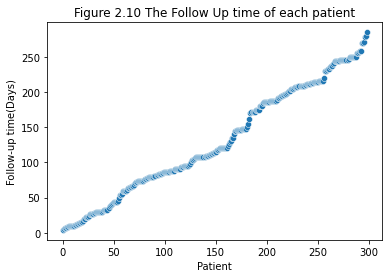

In [58]:
sns.scatterplot(data=HFCR, x= HFCR.index, y="time")
plt.title("Figure 2.10 The Follow Up time of each patient") #title
plt.xlabel("Patient") #x label
plt.ylabel("Follow-up time(Days)") #y label
plt.show()

The graph shows the follow-up days of each patient, that start from 4 days to 285 days.

### DEATH EVENT

In [59]:
HFCR['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [60]:
print("Using this line of code, we can see that 96 patients were deceased during the follow-up period whilst 203 are not")

Using this line of code, we can see that 96 patients were deceased during the follow-up period whilst 203 are not


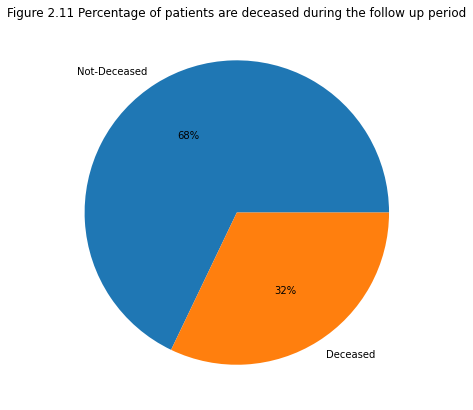

In [61]:
Status = ['Not-Deceased', 'Deceased']
data = [203, 96]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.11 Percentage of patients are deceased during the follow up period')
plt.show()

From this figure, we can see that 32% of the pacient were deceased during the follow-up period

## 2.2 Exploring relationship between pairs of attributes

6 variables are chooesd inorder to compound 15 pairs of attributes : Age, Diabetes, High Blood Pressure, smoking, Serum sodium and deceased .

In [62]:
#diavhbp = HFCR[(HFCR['diabetes'] == 1) & (HFCR['high_blood_pressure'] == 1)]
diavhbp= np.where((HFCR["diabetes"] ==1) & (HFCR["high_blood_pressure"] ==1), True, False)
print(diavhbp)


[False False False False False False False False False False False False
 False False False False False False False False False  True False False
  True False False  True False False  True False  True False  True False
 False  True False False False  True  True  True False False False  True
 False False False False False  True False False False False False  True
  True False False False False False False False False False False False
 False False False False False False  True False False False False False
  True False False  True  True False False False False False  True False
  True False  True False False False False False False False False False
 False False False False False False  True False  True False  True False
 False  True False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False Fa

In [63]:
sdiavhbp = sum(diavhbp)
print(sdiavhbp)

43


In [64]:
125-43

82

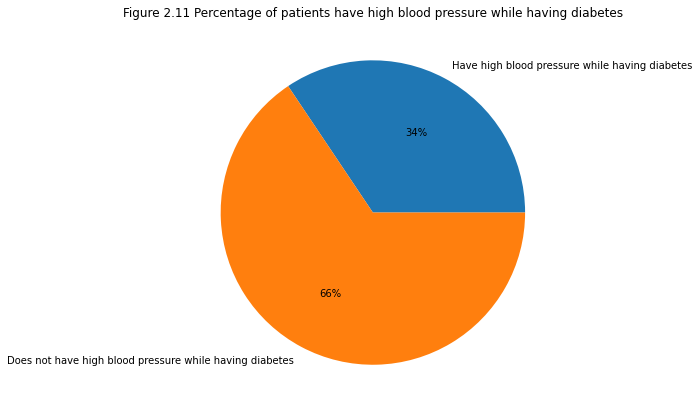

In [65]:
Status = ['Have high blood pressure while having diabetes', 'Does not have high blood pressure while having diabetes']
data = [43, 82]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.11 Percentage of patients have high blood pressure while having diabetes')
plt.show()

Which can see that 34% of the patient have both diabetes and high blood pressure, which does not show a very strong correlation between these two variables however still related

In [66]:
diavdeath= np.where((HFCR["diabetes"] ==1) & (HFCR["DEATH_EVENT"] ==1), True, False)
print(diavdeath)

[False False False False  True False False  True False False False False
 False False False False False False False  True False  True False False
  True  True False  True False  True  True False  True False  True  True
  True  True False  True False  True  True False  True  True False  True
 False False False False  True  True  True False False False False  True
  True False False False False False  True False False  True False False
 False False False False False False False False False False  True False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  T

In [67]:
sdiavdeath = sum(diavdeath)
print(sdiavdeath)

40


In [68]:
125-40

85

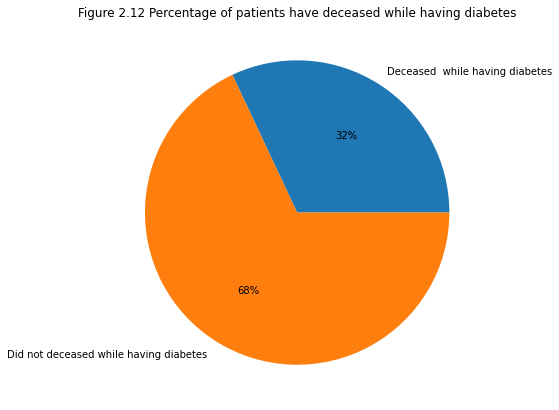

In [69]:
Status = ['Deceased  while having diabetes', 'Did not deceased while having diabetes']
data = [40, 85]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.12 Percentage of patients have deceased while having diabetes')
plt.show()

Which can see that 32% of the patient have deceased while having diabetes, which does not show a very strong correlation between these two variables but still have some connection.

In [70]:
diavsmk= np.where((HFCR["diabetes"] ==1) & (HFCR["smoking"] ==1), True, False)
print(diavsmk)

[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False  True False  True False  True False False False False False False
 False False False False False  True  True False False  True False  True
 False False False False False False  True False False False False  True
 False False False False False False False False False False False  True
 False  True False False False False  True False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

In [71]:
sdiavsmk = sum(diavsmk)
print(sdiavsmk)

30


In [72]:
125-30

95

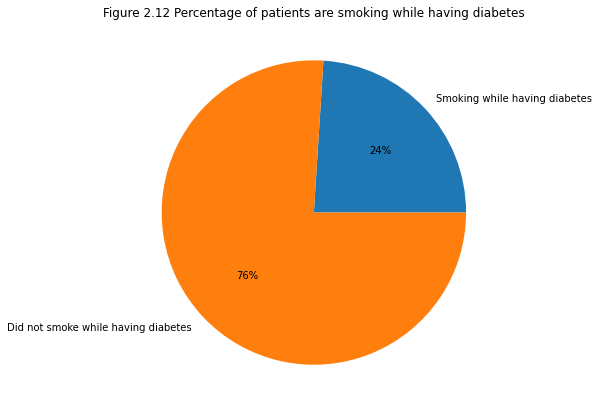

In [73]:
Status = ['Smoking while having diabetes', 'Did not smoke while having diabetes']
data = [30, 95]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.12 Percentage of patients are smoking while having diabetes')
plt.show()

24% of the patient are smoking while having diabetes that does not show a strong positive correlation between these two variables.

In [74]:
hbpvdeath= np.where((HFCR["high_blood_pressure"] ==1) & (HFCR["DEATH_EVENT"] ==1), True, False)
print(hbpvdeath)

[ True False False False False  True False False False  True  True  True
 False  True False False False False  True False False  True  True False
  True False  True  True False False  True False  True False  True False
 False  True False False  True  True  True False False False  True  True
  True False  True  True False  True False False False False  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
  True False False False False False  True False False False False False
 False False False False False False False False Fa

In [75]:
shbpvdeath = sum(hbpvdeath)
print(shbpvdeath)

39


In [76]:
105-39

66

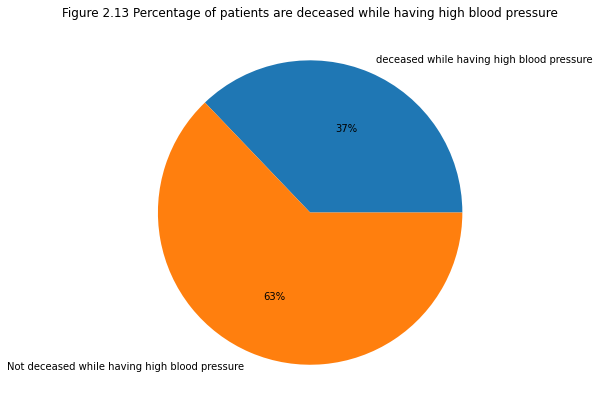

In [77]:
Status = ['deceased while having high blood pressure', 'Not deceased while having high blood pressure']
data = [39, 66]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.13 Percentage of patients are deceased while having high blood pressure')
plt.show()

### Which can see that 37% of the patient have deceased while having having high blood pressure, which shows that it somehow have some effect with the pacient's deceased.

In [78]:
hbpvsmk= np.where((HFCR["high_blood_pressure"] ==1) & (HFCR["smoking"] ==1), True, False)
print(hbpvsmk)

[False False False False False  True False False False  True  True  True
 False False False False False False False False False False  True False
 False False False  True False False False False False False False False
 False False False False  True  True  True False False False False  True
 False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False  True False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
  True False False False False False False False  True False  True False
 False  True False False False False False False False False False False
  True False False False False False False False  True False False False
 False False False  True False False False False Fa

In [79]:
shbpvsmk = sum(hbpvsmk)
print(shbpvsmk)

30


In [80]:
105-30

75

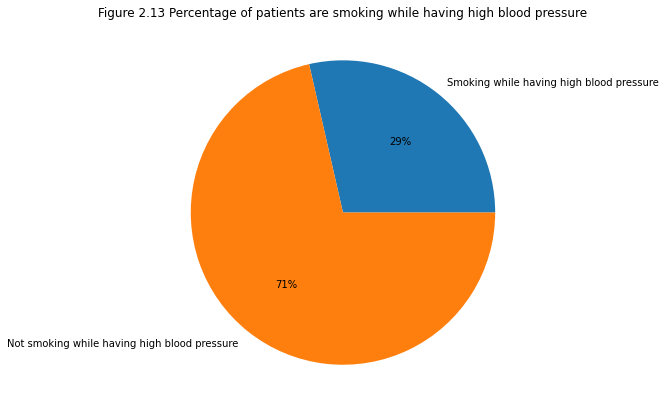

In [81]:
Status = ['Smoking while having high blood pressure', 'Not smoking while having high blood pressure']
data = [30, 75]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.13 Percentage of patients are smoking while having high blood pressure')
plt.show()

29% of the patient are smoking while having high blood pressure so that smoking could be a factor to high blood pressure.

In [82]:
smkvdeath= np.where((HFCR["smoking"] ==1) & (HFCR["DEATH_EVENT"] ==1), True, False)
print(smkvdeath)

[False False  True False False  True False  True False  True  True  True
 False False False False False False False False False False  True False
 False  True False  True False  True False False False False False False
 False False False False  True  True  True False False  True False  True
 False False False False False False  True False False False  True  True
 False False False False False  True False  True False False False False
  True False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False Fa

In [83]:
ssmkvdeath = sum(smkvdeath)
print(ssmkvdeath)

30


In [84]:
96-30

66

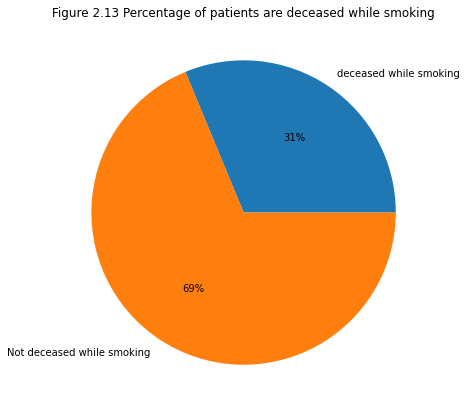

In [85]:
Status = ['deceased while smoking', 'Not deceased while smoking']
data = [30, 66]
fig = plt.figure(figsize =(7, 7))
plt.pie(data, labels = Status, autopct='%1.0f%%')
plt.title('Figure 2.13 Percentage of patients are deceased while smoking')
plt.show()

The Figure shows that 31% of the patient were deceased while smoking which shown that it could be a factor caused of patient's deceased.

<AxesSubplot:xlabel='age', ylabel='diabetes'>

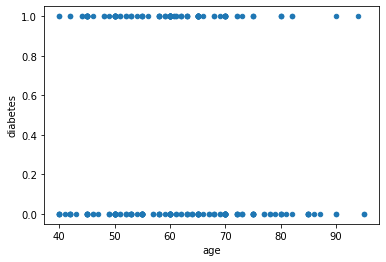

In [86]:
HFCR.plot( x='age', y='diabetes', kind='scatter')

In [87]:
eld = sum(np.where((HFCR["age"] >=65) & (HFCR["diabetes"] ==1), True, False))
print(eld)
yoo = sum(np.where((HFCR["age"] < 65) & (HFCR["diabetes"] ==1), True, False))
print(yoo)

41
84


In [88]:
sum(HFCR["age"] >=65)


115

In [89]:
sum(HFCR["age"] < 65)

184

In [90]:
41/115

0.3565217391304348

In [91]:
84/184

0.45652173913043476

Where elder people with age above 65 have smaller percentage ratio to have diabetes then patients with age below 65.

<AxesSubplot:xlabel='serum_sodium', ylabel='diabetes'>

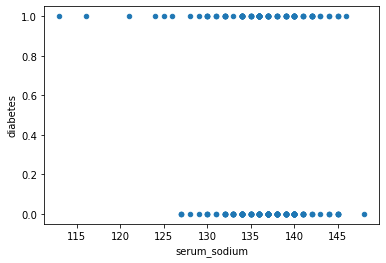

In [92]:
HFCR.plot( x='serum_sodium', y='diabetes', kind='scatter')

In [93]:
diso = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["diabetes"] ==1), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["diabetes"] ==1), True, False)) 
print(diso)

38


In [94]:
diso2 = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["diabetes"] ==0), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["diabetes"] ==0), True, False)) 
print(diso2)

47


In [95]:
sum(HFCR["diabetes"]==1)

125

In [96]:
125-38

87

In [97]:
38/125

0.304

<AxesSubplot:xlabel='serum_sodium', ylabel='DEATH_EVENT'>

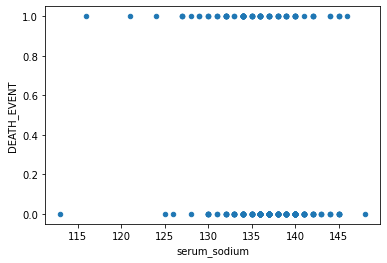

In [98]:
HFCR.plot( x='serum_sodium', y='DEATH_EVENT', kind='scatter')

30.4% of the patient with diabetes does not have an ideal range of serum sodium, which means most of the people with diabetes does have an ideal range of serum sodium

In [99]:
deso = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["DEATH_EVENT"] ==1), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["DEATH_EVENT"] ==1), True, False)) 
print(deso)
deso2 = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["DEATH_EVENT"] ==0), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["DEATH_EVENT"] ==0), True, False)) 
print(deso2)

43
42


In [100]:
43/85

0.5058823529411764

Within the patient do not have an ideal range of serum sodium about 50.5% of them were deceased, that could means that this is a very important factor of weather the patient can survive longer. 

<AxesSubplot:xlabel='serum_sodium', ylabel='high_blood_pressure'>

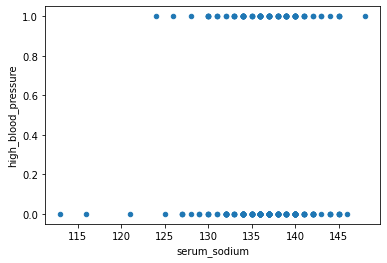

In [101]:
HFCR.plot( x='serum_sodium', y='high_blood_pressure', kind='scatter')

In [102]:
hbpso = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["high_blood_pressure"] ==1), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["high_blood_pressure"] ==1), True, False)) 
print(hbpso)
hbpso2 = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["high_blood_pressure"] ==0), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["high_blood_pressure"] ==0), True, False)) 
print(hbpso2)

31
54


In [103]:
31/85

0.36470588235294116

Within the patient do not have an ideal range of serum sodium about 36.5% of them were having high blood pressure, that could means that high blood pressure could be caused by low/high serum sodium level but not as sufficient as people deceased.

<AxesSubplot:xlabel='serum_sodium', ylabel='smoking'>

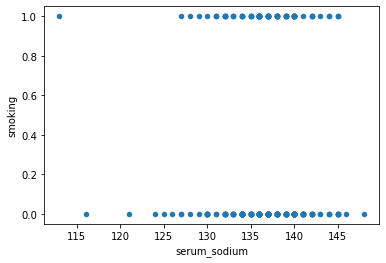

In [104]:
HFCR.plot( x='serum_sodium', y='smoking', kind='scatter')

In [105]:
smkso = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["high_blood_pressure"] ==1), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["high_blood_pressure"] ==1), True, False)) 
print(smkso)
smkso2 = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["high_blood_pressure"] ==0), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["high_blood_pressure"] ==0), True, False)) 
print(smkso2)

31
54


Within the patient do not have an ideal range of serum sodium about 36.5% of them were smoking, that could means that smoking could be a main factor the low/high serum sodium level in

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

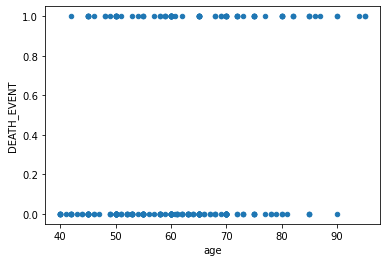

In [106]:
HFCR.plot( x='age', y='DEATH_EVENT', kind='scatter')

In [107]:
eagdi= sum(np.where((HFCR["age"] >=65) & (HFCR["DEATH_EVENT"] == 1), True, False))
print(eagdi)
yagdi= sum(np.where((HFCR["age"] < 65) & (HFCR["DEATH_EVENT"] == 1), True, False))
print(yagdi)

50
46


In [108]:
50/115

0.43478260869565216

In [109]:
46/184

0.25

Where about 43.5% of the patient above age 65 were deceased during the follow up period and only 25% of the patient with age below 65 were deceased, that shows increase in age might caused higher change of deceased.

<AxesSubplot:xlabel='age', ylabel='high_blood_pressure'>

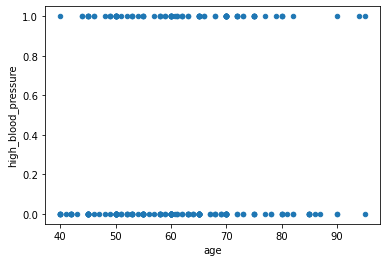

In [110]:
HFCR.plot( x='age', y='high_blood_pressure', kind='scatter')

In [111]:
eaghbp= sum(np.where((HFCR["age"] >=65) & (HFCR["high_blood_pressure"] == 1), True, False))
print(eaghbp)
yaghbp= sum(np.where((HFCR["age"] < 65) & (HFCR["high_blood_pressure"] == 1), True, False))
print(yaghbp)

48
57


In [112]:
a2= 48/115
b2= 57/184
print(a2)
print(b2)

0.41739130434782606
0.30978260869565216


Where about 41.7% of the patient above age 65 were having high blood pressure during the follow up period and 31% of the patient with age below 65 were having high blood pressure, that shows increase in age might caused higher change of having high blood pressure.

<AxesSubplot:xlabel='age', ylabel='smoking'>

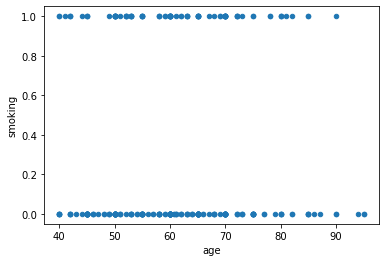

In [113]:
HFCR.plot( x='age', y='smoking', kind='scatter')

In [114]:
eagsmk= sum(np.where((HFCR["age"] >=65) & (HFCR["smoking"] == 1), True, False))
print(eagsmk)
yagsmk= sum(np.where((HFCR["age"] < 65) & (HFCR["smoking"] == 1), True, False))
print(yagsmk)

38
58


In [115]:
a3= 38/115
b3= 58/184
print(a3)
print(b3)

0.33043478260869563
0.31521739130434784


For patient age 65 and above, about 33% of them were smoking at the same time for patient below age 65, 31.5% of them were smoking which shows that with the change of age, that doesnt change weather people were smoking of not.

<AxesSubplot:xlabel='age', ylabel='serum_creatinine'>

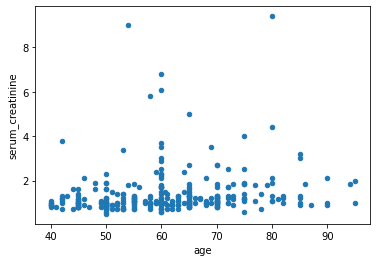

In [116]:
HFCR.plot( x='age', y='serum_creatinine', kind='scatter')

In [117]:
agso = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["age"] >=65), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["age"] >=65), True, False)) 
print(agso)
agso2 = sum(np.where((HFCR["serum_sodium"] >145) & (HFCR["age"] < 65), True, False)) +sum(np.where((HFCR["serum_sodium"] <135) & (HFCR["high_blood_pressure"] < 65), True, False)) 
print(agso2)

44
84


There 128 patient not having an ideal range of serum sodium where 44 were age 65 and above, 84 were below age 65.
There are total 115 patient age 65 and above and 184 patient below age 65.

In [118]:
a7 = 44/115
b7 = 84/184
print(a7)
print(b7)

0.3826086956521739
0.45652173913043476


38.3% of the patient  age 65 and above were not having an ideal level of serum sodium on the other hand 45.7% of the paticet with age below 65 were not having an ideal level of serum sodium, which might shows that the increase in age could be a factor that less likely to have the problem of having a non-ideal level of serum sodium.

# Task 3: Data Modelling

Scikit-learn metrics module will be used for accuracy calculation

In [119]:
HFCR = pd.read_csv('heart_failure_clinical_records_dataset.csv') # Re-import to avoid any possible errors

## Features and Labels

In [120]:
X = HFCR.drop(columns=["DEATH_EVENT"]).values
y = HFCR['DEATH_EVENT'].values
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
print("Feature set shape: ", X.shape)
print("Label set shape: ", y.shape)

Feature set shape:  (299, 12)
Label set shape:  (299,)


## Feature selection using Chi-square statistics test
See references [1], [2] and [3] in report

In [121]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
for i in range(len(HFCR.columns[:-1])):
  print(HFCR.columns[i], fit.scores_[i]) #this displays each feature with the score for that feature

age 2.3688455650760254
anaemia 0.7465934114891604
creatinine_phosphokinase 0.2520288462558739
diabetes 0.0006568144499178924
ejection_fraction 1.8945159685815756
high_blood_pressure 1.221538529204786
platelets 0.03502136324914082
serum_creatinine 3.471610297250155
serum_sodium 0.26736792912971147
sex 0.001956265975995817
smoking 0.032346828817734236
time 14.050285792119666


Age, anaemia, ejection_fraction, serum_creatinine, high_blood_pressure and time have the highest scores.

## Correlation matrix for further feature identification

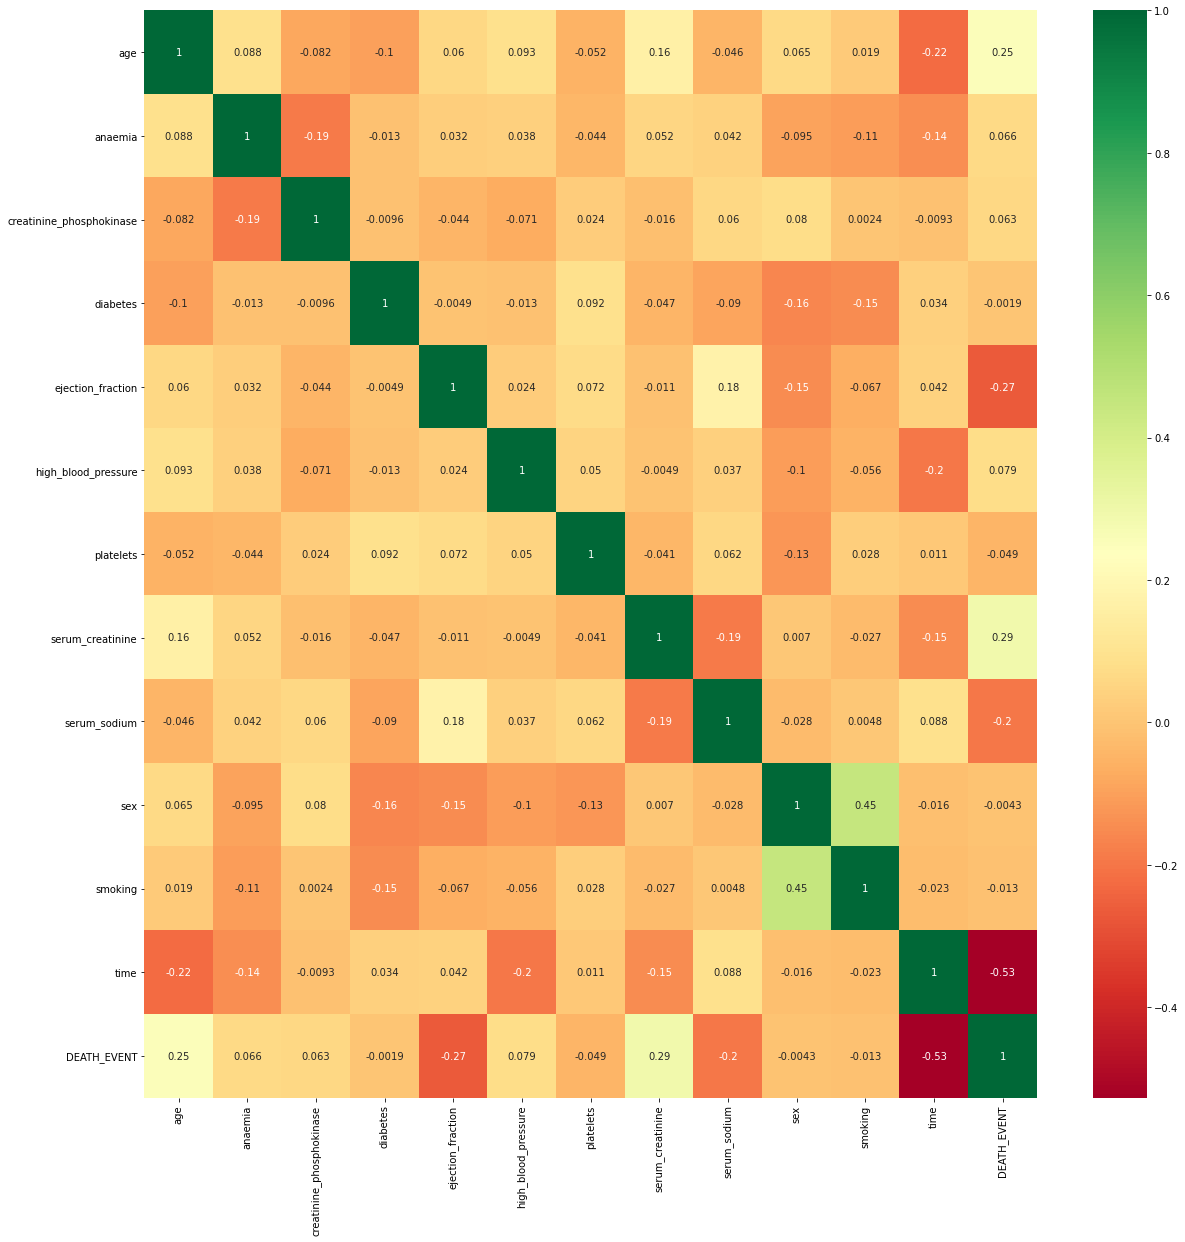

In [122]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(HFCR.corr(), annot=True, cmap="RdYlGn") #HFCR.corr() generates the correlation matrix

## Selected Features

When observing the last row, we can see that DEATH_EVENT has a considerable correlation(negative or positive) with age,
ejection_fraction, serum_creatinine, serum_sodium and time. These are the same features identified from chi-square test
but high blood pressure has a low correlation value. However, we will keep that too, other columns will not be used.

In [123]:
HFCR_F = HFCR[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'platelets', 'high_blood_pressure']]
HFCR_F.head(5)

,age,ejection_fraction,serum_creatinine,serum_sodium,time,platelets,high_blood_pressure
0,75.0,20,1.9,130,4,265000.00,1
1,55.0,38,1.1,136,6,263358.03,0
2,65.0,20,1.3,129,7,162000.00,0
3,50.0,20,1.9,137,7,210000.00,0
4,65.0,20,2.7,116,8,327000.00,0


In [124]:
X = HFCR_F.values #  returns a numpy array
min_max_scaler = MinMaxScaler() #  Scaling the new feature set
X = min_max_scaler.fit_transform(X)

## Train set and test set

Randomly choose 30% of the database for testing, and the rest will be used for training.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, HFCR['DEATH_EVENT'].values, test_size=0.3, shuffle=True)

## Decision Tree Classifier

In [126]:
clf = DecisionTreeClassifier() # Create Decision Tree classifier
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifier
y_pred = clf.predict(X_test) #Predict the response for test dataset

In [127]:
# Model Accuracy, how often is the classifier correct?
DTCAccuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy for Decision tree model:", DTCAccuracy.round(3), "%")

Accuracy for Decision tree model: 78.889 %


## K-Nearest Neighbour

In [128]:
# this code calculates for the best k value to use
accuracy = []
best_knn =None
prev_acc = 0
best_k = 0
k_range = [i for i in range(3,15)]
for i in k_range:
  KNN = KNeighborsClassifier(n_neighbors=i)

  # Train the model using the training sets
  KNN.fit(X_train, y_train)

  #Predict Output
  y_pred_knn= KNN.predict(X_test)
  curr_acc = metrics.accuracy_score(y_test, y_pred_knn)*100
  accuracy.append(curr_acc)
  if prev_acc<curr_acc:
    best_knn = KNN
    best_k = i
  prev_acc = curr_acc
print('Best K value to use: ',best_k)

Best K value to use:  11


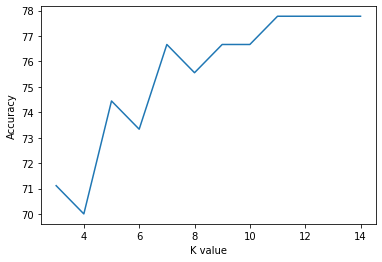

In [129]:
plt.figure()
plt.xlabel('K value') 
plt.ylabel('Accuracy')
plt.plot(k_range, accuracy)
plt.show()

As we can see here, the code above had selected the best k value to use when comparing accuracy between different K
values and the corresponding prediction accuracy.

In [130]:
knn = best_knn
y_pred_knn = knn.predict(X_test)
knnAccuracy = metrics.accuracy_score(y_test, y_pred_knn)*100
print("Accuracy of KNN model:", knnAccuracy.round(3), '%')

Accuracy of KNN model: 77.778 %
